### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes = True)
sns.set(rc={'figure.figsize': (10,8.1)})
pd.options.display.float_format = "{:.2f}".format
sns.set_theme(style="whitegrid")

In [2]:
data_set = pd.read_excel('../data/marketing_campaign.xlsx', index_col = 0)
data_set.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


### Dealing with duplicate values

In [3]:
dup_rows= data_set[data_set.duplicated()]
print(dup_rows.shape)

(182, 28)


###### dropping duplicate datas

In [4]:
data_set = data_set.drop_duplicates()
print(data_set[data_set.duplicated()].shape)

(0, 28)


In [5]:
data_set.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

#### Dealing with Missing values 

##### Missing value percentage 

In [6]:
data_set.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Missing value Percentage

data_set['Income'].isna().sum()/len(data_set)

0.011661807580174927

In [8]:
# Missing value dataset

data_set[data_set['Income'].isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
1994,1983,Graduation,Married,nan,1,0,2013-11-15,11,5,5,...,7,0,0,0,0,0,0,3,11,0
5255,1986,Graduation,Single,nan,1,0,2013-02-20,19,5,1,...,1,0,0,0,0,0,0,3,11,0
7281,1959,PhD,Single,nan,0,0,2013-11-05,80,81,11,...,2,0,0,0,0,0,0,3,11,0
7244,1951,Graduation,Single,nan,2,1,2014-01-01,96,48,5,...,6,0,0,0,0,0,0,3,11,0
8557,1982,Graduation,Single,nan,1,0,2013-06-17,57,11,3,...,6,0,0,0,0,0,0,3,11,0
10629,1973,2n Cycle,Married,nan,1,0,2012-09-14,25,25,3,...,8,0,0,0,0,0,0,3,11,0
8996,1957,PhD,Married,nan,2,1,2012-11-19,4,230,42,...,9,0,0,0,0,0,0,3,11,0
9235,1957,Graduation,Single,nan,1,1,2014-05-27,45,7,0,...,7,0,0,0,0,0,0,3,11,0
5798,1973,Master,Together,nan,0,0,2013-11-23,87,445,37,...,1,0,0,0,0,0,0,3,11,0


###### Handling Missing values

In [9]:
df = data_set.copy()
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,...,5,0,0,0,0,0,0,3,11,0


###### Filling null values with grouped Mean

In [10]:
df['Income'] = df.groupby('Education')['Income'].transform(lambda group : group.fillna(np.mean(group)))

In [11]:
df['Income'].isna().sum()

0

###### Clearing up Columns

In [12]:
df.columns


Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [13]:
df['Child_in_home'] = df['Kidhome'] + df['Teenhome']
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,0
2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,2
4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,0
6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,1
5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,1


In [14]:
df_copy = df.copy()
df_copy.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,0
2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,2
4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,0
6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,1
5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,1


In [15]:
df_copy.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Child_in_home'],
      dtype='object')

In [16]:
df_copy['Camp_accepted'] = df_copy['AcceptedCmp3'] + df_copy['AcceptedCmp4'] + df_copy['AcceptedCmp5'] + df_copy['AcceptedCmp1'] + df_copy['AcceptedCmp2']
df_copy.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.00,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,0,0
2174,1954,Graduation,Single,46344.00,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,2,0
4141,1965,Graduation,Together,71613.00,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,0,0
6182,1984,Graduation,Together,26646.00,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,1,0
5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,1,0


In [17]:
df_copy=df_copy.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Kidhome', 'Teenhome'], axis = 1).copy()



In [18]:
df_copy.head()

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.00,2012-09-04,58,635,88,546,172,...,8,10,4,7,0,3,11,1,0,0
2174,1954,Graduation,Single,46344.00,2014-03-08,38,11,1,6,2,...,1,1,2,5,0,3,11,0,2,0
4141,1965,Graduation,Together,71613.00,2013-08-21,26,426,49,127,111,...,8,2,10,4,0,3,11,0,0,0
6182,1984,Graduation,Together,26646.00,2014-02-10,26,11,4,20,10,...,2,0,4,6,0,3,11,0,1,0
5324,1981,PhD,Married,58293.00,2014-01-19,94,173,43,118,46,...,5,3,6,5,0,3,11,0,1,0


In [19]:
 df_copy['Item Purchased'] = df_copy['MntWines'] + df_copy['MntFruits'] + df_copy['MntMeatProducts'] + df_copy['MntFishProducts'] + df_copy['MntSweetProducts'] + df_copy['MntGoldProds']

In [20]:
df_copy = df_copy.drop(['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds'], axis = 1).copy()

In [21]:
df_copy.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Dt_Customer',
       'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Child_in_home',
       'Camp_accepted', 'Item Purchased'],
      dtype='object')

In [22]:
df_copy['Age'] = 2014 - df_copy['Year_Birth']

In [23]:
df_copy = df_copy.drop(['Year_Birth'], axis = 1).copy()

In [24]:
df_copy.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted,Item Purchased,Age
ID,,,,,,,,,,,,,,,,,,
5524,Graduation,Single,58138.00,2012-09-04,58,3,8,10,4,7,0,3,11,1,0,0,1617,57
2174,Graduation,Single,46344.00,2014-03-08,38,2,1,1,2,5,0,3,11,0,2,0,27,60
4141,Graduation,Together,71613.00,2013-08-21,26,1,8,2,10,4,0,3,11,0,0,0,776,49
6182,Graduation,Together,26646.00,2014-02-10,26,2,2,0,4,6,0,3,11,0,1,0,53,30
5324,PhD,Married,58293.00,2014-01-19,94,5,5,3,6,5,0,3,11,0,1,0,422,33


In [25]:
df_copy['Z_Revenue'].mean()

11.0

In [26]:
df_copy.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted,Item Purchased,Age
count,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00
mean,52364.70,48.95,2.34,4.10,2.66,5.77,5.32,0.01,3.00,11.00,0.15,0.95,0.30,606.24,45.21
std,25378.94,29.00,1.94,2.80,2.93,3.24,2.44,0.10,0.00,0.00,0.36,0.75,0.68,602.84,11.97
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,0.00,0.00,5.00,18.00
25%,35701.75,24.00,1.00,2.00,0.00,3.00,3.00,0.00,3.00,11.00,0.00,0.00,0.00,69.00,37.00
50%,51912.00,49.00,2.00,4.00,2.00,5.00,6.00,0.00,3.00,11.00,0.00,1.00,0.00,396.50,44.00
75%,68242.50,74.00,3.00,6.00,4.00,8.00,7.00,0.00,3.00,11.00,0.00,1.00,0.00,1046.50,55.00
max,666666.00,99.00,15.00,27.00,28.00,13.00,20.00,1.00,3.00,11.00,1.00,3.00,4.00,2525.00,121.00


In [27]:
df_copy['Marital_Situation']=df_copy['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'}, inplace = True)

In [28]:
df_copy['Marital_Situation'].head()

ID
5524    None
2174    None
4141    None
6182    None
5324    None
Name: Marital_Situation, dtype: object

In [29]:
df_copy.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted,Item Purchased,Age,Marital_Situation
ID,,,,,,,,,,,,,,,,,,,
5524,Graduation,Alone,58138.00,2012-09-04,58,3,8,10,4,7,0,3,11,1,0,0,1617,57,None
2174,Graduation,Alone,46344.00,2014-03-08,38,2,1,1,2,5,0,3,11,0,2,0,27,60,None
4141,Graduation,In couple,71613.00,2013-08-21,26,1,8,2,10,4,0,3,11,0,0,0,776,49,None
6182,Graduation,In couple,26646.00,2014-02-10,26,2,2,0,4,6,0,3,11,0,1,0,53,30,None
5324,PhD,In couple,58293.00,2014-01-19,94,5,5,3,6,5,0,3,11,0,1,0,422,33,None


In [30]:
df_copy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age', 'Marital_Situation'],
      dtype='object')

In [31]:
df_copy.drop(['Marital_Situation'], axis = 1, inplace = True)

In [32]:
df_copy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age'],
      dtype='object')

In [33]:
df_copy.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted,Item Purchased,Age
ID,,,,,,,,,,,,,,,,,,
5524,Graduation,Alone,58138.00,2012-09-04,58,3,8,10,4,7,0,3,11,1,0,0,1617,57
2174,Graduation,Alone,46344.00,2014-03-08,38,2,1,1,2,5,0,3,11,0,2,0,27,60
4141,Graduation,In couple,71613.00,2013-08-21,26,1,8,2,10,4,0,3,11,0,0,0,776,49
6182,Graduation,In couple,26646.00,2014-02-10,26,2,2,0,4,6,0,3,11,0,1,0,53,30
5324,PhD,In couple,58293.00,2014-01-19,94,5,5,3,6,5,0,3,11,0,1,0,422,33


In [34]:
df_copy.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted,Item Purchased,Age
count,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00,2058.00
mean,52364.70,48.95,2.34,4.10,2.66,5.77,5.32,0.01,3.00,11.00,0.15,0.95,0.30,606.24,45.21
std,25378.94,29.00,1.94,2.80,2.93,3.24,2.44,0.10,0.00,0.00,0.36,0.75,0.68,602.84,11.97
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,0.00,0.00,5.00,18.00
25%,35701.75,24.00,1.00,2.00,0.00,3.00,3.00,0.00,3.00,11.00,0.00,0.00,0.00,69.00,37.00
50%,51912.00,49.00,2.00,4.00,2.00,5.00,6.00,0.00,3.00,11.00,0.00,1.00,0.00,396.50,44.00
75%,68242.50,74.00,3.00,6.00,4.00,8.00,7.00,0.00,3.00,11.00,0.00,1.00,0.00,1046.50,55.00
max,666666.00,99.00,15.00,27.00,28.00,13.00,20.00,1.00,3.00,11.00,1.00,3.00,4.00,2525.00,121.00


### Plotting

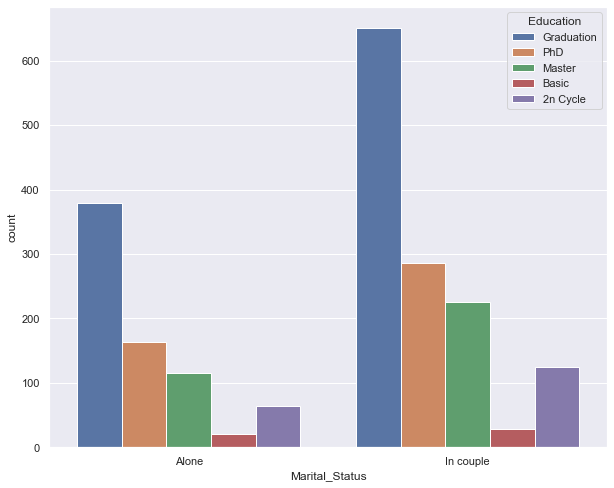

In [35]:
count_plot = sns.countplot(x = 'Marital_Status' , hue = 'Education', data = df_copy)
count_plot

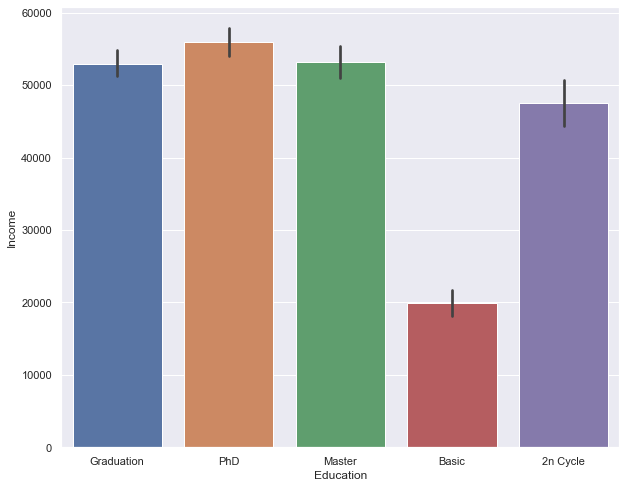

In [36]:
bar_plot = sns.barplot(x = "Education", y = "Income", data = df_copy)

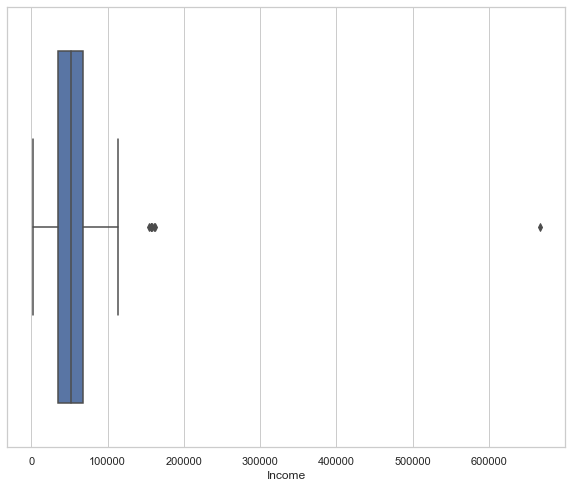

In [37]:
sns.set_theme(style="whitegrid")
bp = sns.boxplot(x = "Income", data = df_copy)
bp

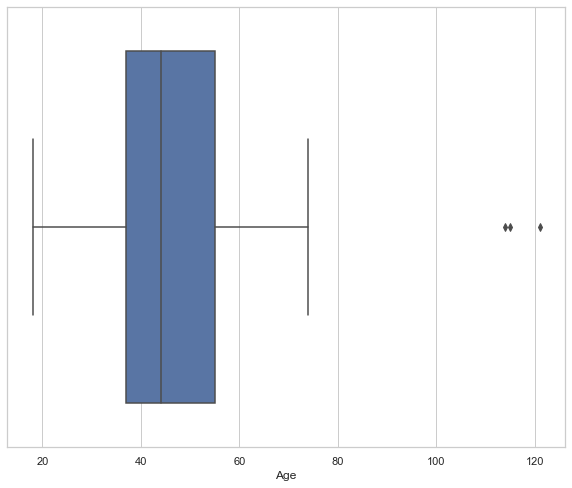

In [38]:
bp = sns.boxplot(x = "Age", data = df_copy)
bp

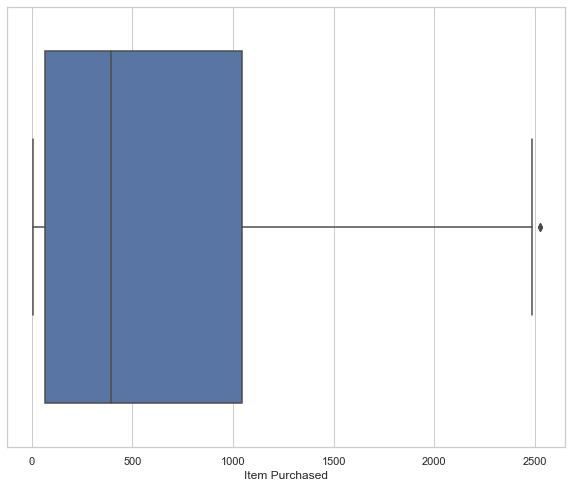

In [39]:
bp = sns.boxplot(x = "Item Purchased", data = df_copy)
bp

#### Handling outlires

In [40]:
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Income                32540.75
Recency                  50.00
NumDealsPurchases         2.00
NumWebPurchases           4.00
NumCatalogPurchases       4.00
NumStorePurchases         5.00
NumWebVisitsMonth         4.00
Complain                  0.00
Z_CostContact             0.00
Z_Revenue                 0.00
Response                  0.00
Child_in_home             1.00
Camp_accepted             0.00
Item Purchased          977.50
Age                      18.00
dtype: float64


In [41]:
dfcopy = df_copy.copy()

In [42]:
dfcopy = dfcopy[~((dfcopy < (Q1 - 1.5 * IQR)) |(dfcopy > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dfcopy.shape)
print(df_copy.shape)

(1361, 18)
(2058, 18)


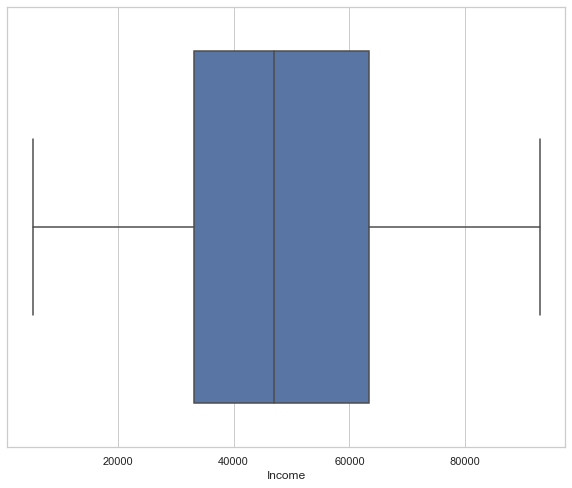

In [43]:
sns.set_theme(style="whitegrid")
bp = sns.boxplot(x = "Income", data = dfcopy)
bp

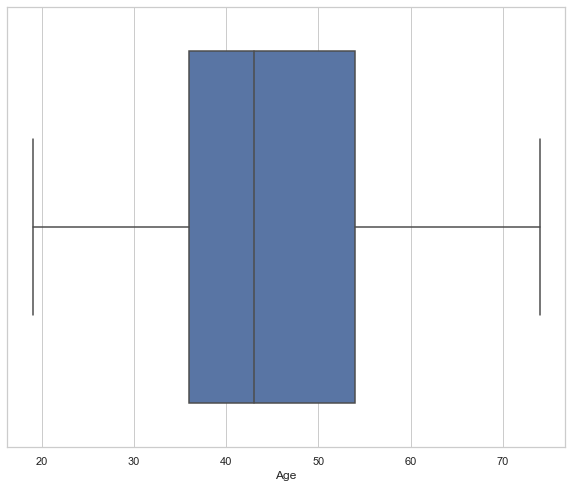

In [44]:
bp = sns.boxplot(x = "Age", data = dfcopy)
bp

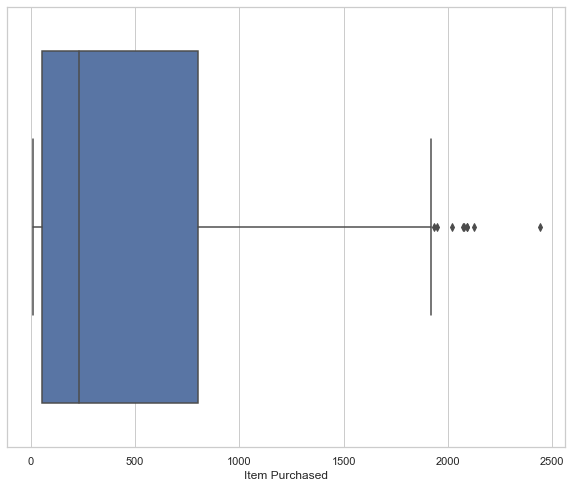

In [45]:
bp = sns.boxplot(x = "Item Purchased", data = dfcopy)
bp

In [46]:
dfcopy.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Child_in_home,Camp_accepted,Item Purchased,Age
count,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00,1361.00
mean,48002.46,50.70,2.14,3.66,2.04,5.53,5.34,0.00,3.00,11.00,0.00,0.99,0.00,455.38,44.70
std,18939.68,28.68,1.33,2.48,2.38,3.16,2.19,0.00,0.00,0.00,0.00,0.65,0.00,494.04,11.46
min,5305.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,11.00,0.00,0.00,0.00,9.00,19.00
25%,33168.00,26.00,1.00,2.00,0.00,3.00,4.00,0.00,3.00,11.00,0.00,1.00,0.00,55.00,36.00
50%,47025.00,51.00,2.00,3.00,1.00,4.00,6.00,0.00,3.00,11.00,0.00,1.00,0.00,231.00,43.00
75%,63381.00,76.00,3.00,5.00,3.00,8.00,7.00,0.00,3.00,11.00,0.00,1.00,0.00,801.00,54.00
max,92859.00,99.00,6.00,11.00,10.00,13.00,13.00,0.00,3.00,11.00,0.00,2.00,0.00,2440.00,74.00


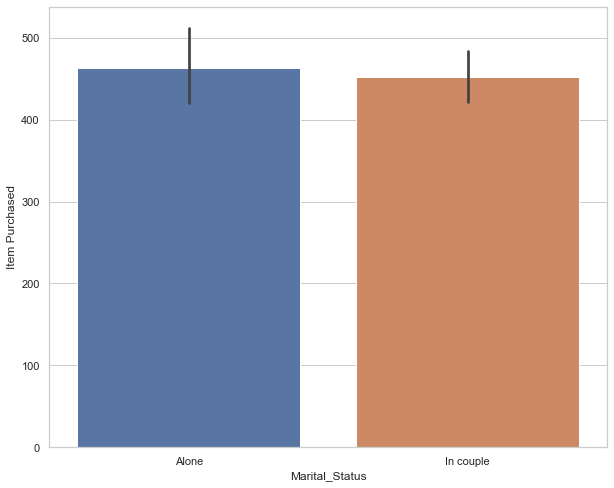

In [47]:
bp = sns.barplot(x = "Marital_Status", y = "Item Purchased", data = dfcopy)

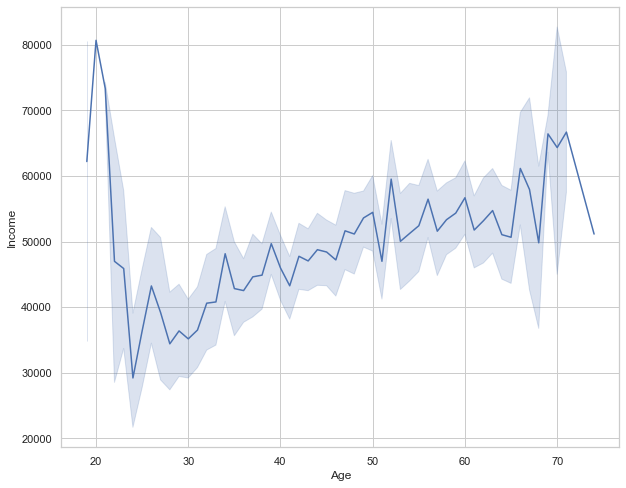

In [48]:
lp  = sns.lineplot(data=dfcopy, x="Age", y="Income")
lp

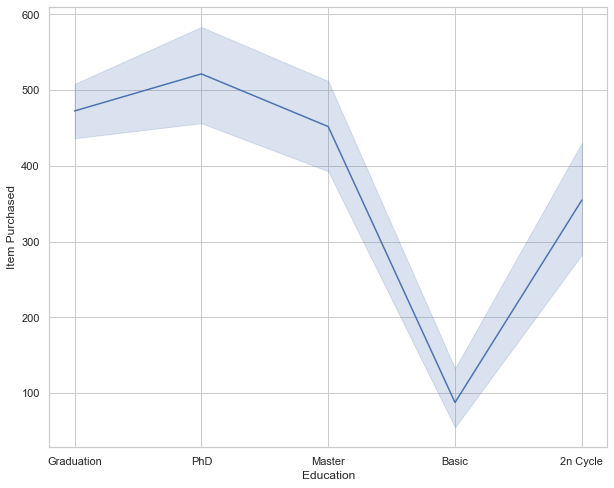

In [49]:
lp  = sns.lineplot(data=dfcopy, x="Education", y="Item Purchased", sort = False)
lp

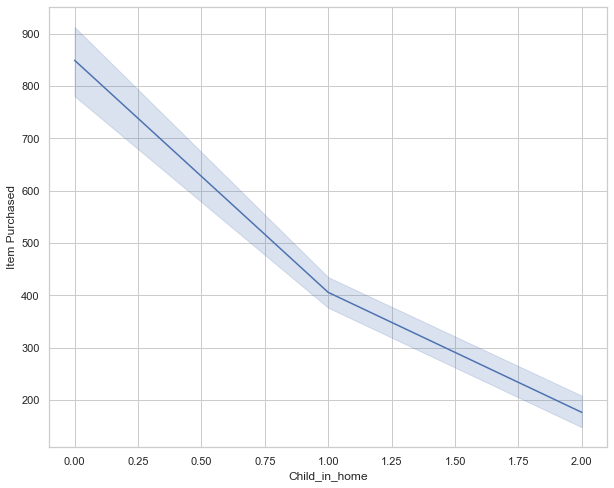

In [50]:
lp  = sns.lineplot(data=dfcopy, x="Child_in_home", y="Item Purchased")
lp

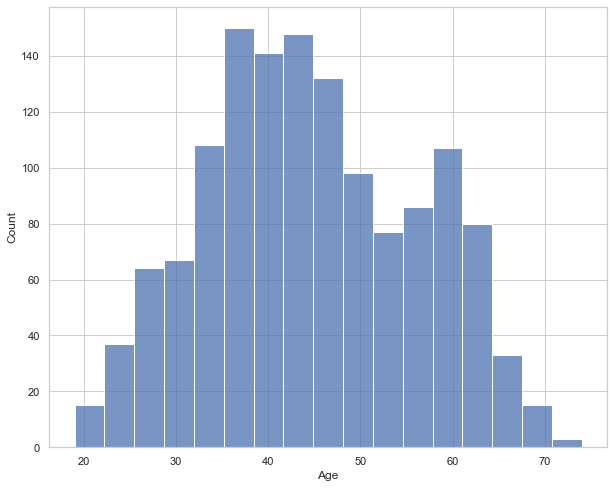

In [51]:
hp = sns.histplot(data = dfcopy, x = "Age")

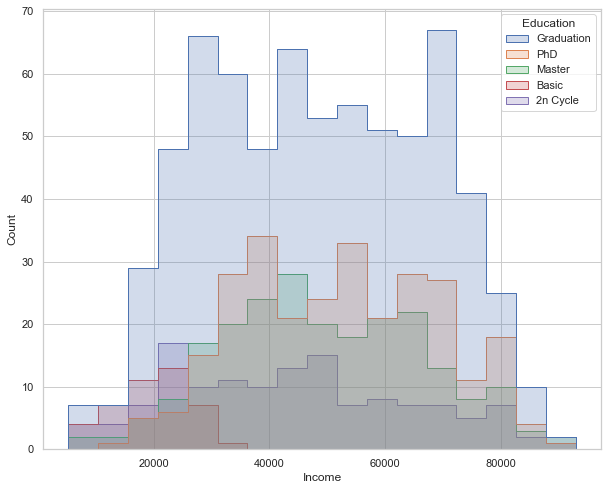

In [52]:
hp = sns.histplot(data = dfcopy, x = "Income",  hue="Education", element="step")

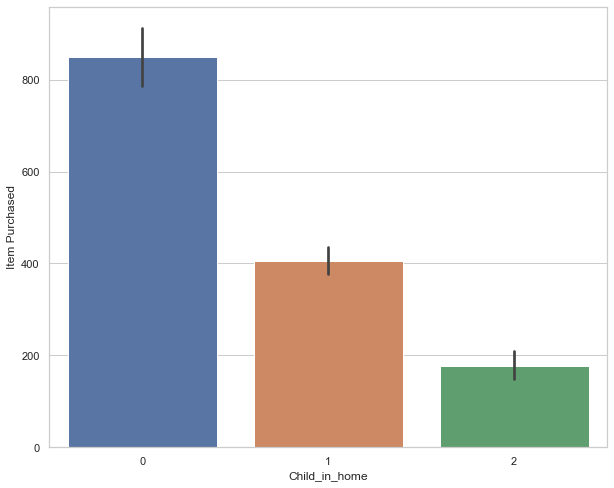

In [53]:
sns.barplot(data=dfcopy, x="Child_in_home", y="Item Purchased")

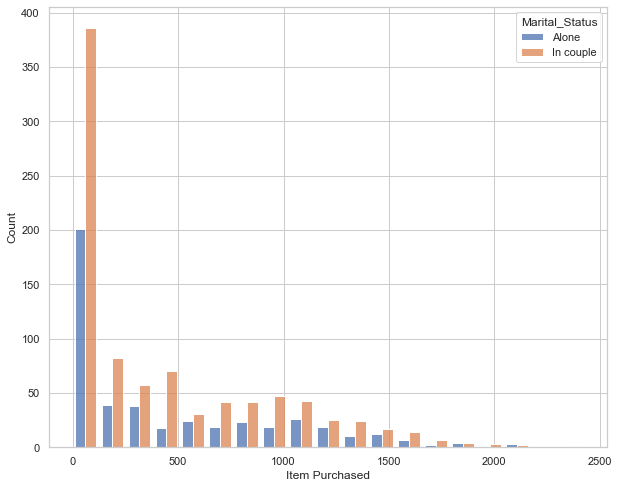

In [54]:
sns.histplot(data=dfcopy, x="Item Purchased", hue="Marital_Status", multiple="dodge", shrink=.8)


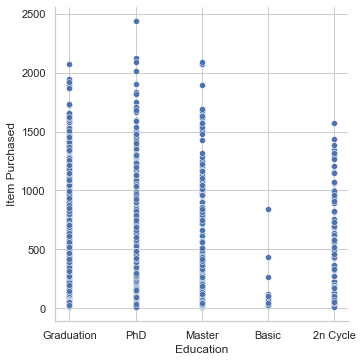

In [55]:
sns.relplot(x="Education", y = "Item Purchased", data=dfcopy)

In [56]:
dfcopy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age'],
      dtype='object')

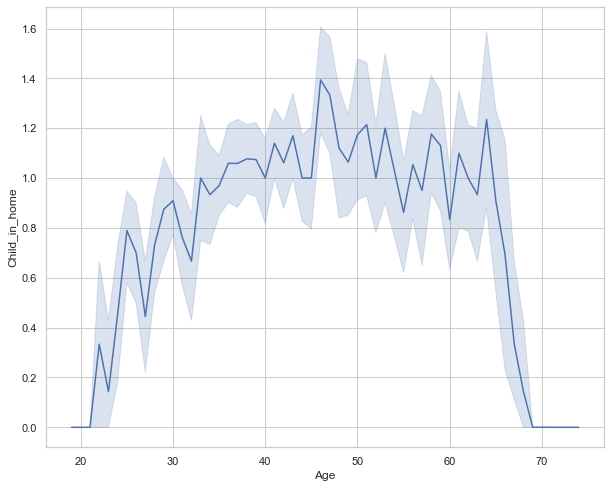

In [57]:
sns.lineplot(x='Age', y = 'Child_in_home' ,data = dfcopy)

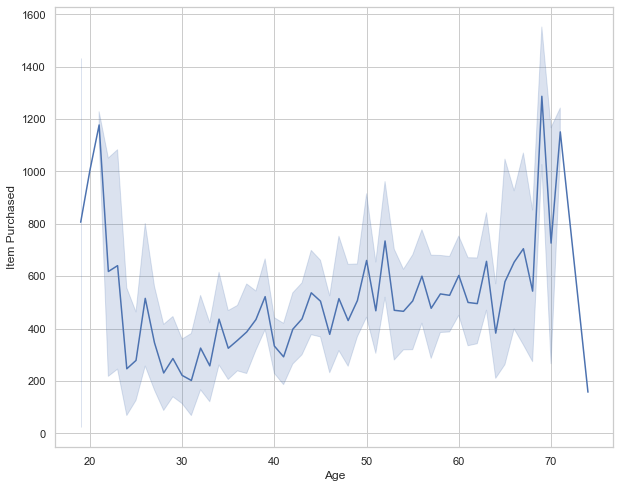

In [58]:
lp  = sns.lineplot(data=dfcopy, x="Age", y="Item Purchased",markers=True, dashes=False)
lp

In [59]:
dfcopy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age'],
      dtype='object')

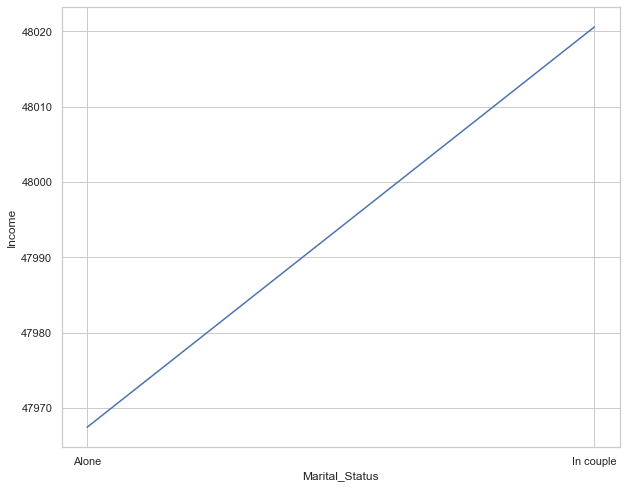

In [60]:
sns.lineplot(x='Marital_Status', y = 'Income' ,data = dfcopy, ci = None)

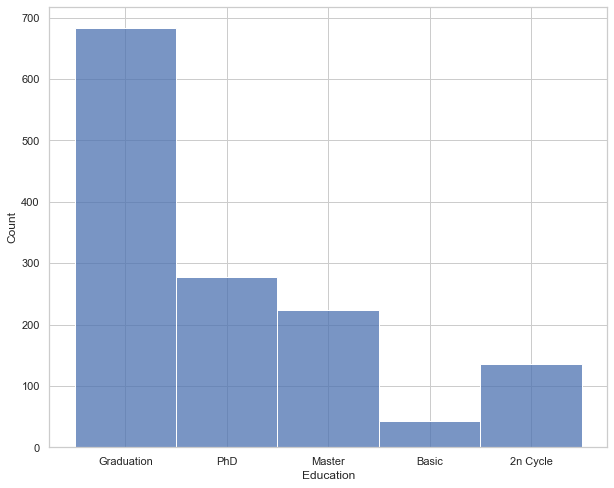

In [61]:
hp = sns.histplot(data = dfcopy, x = "Education")

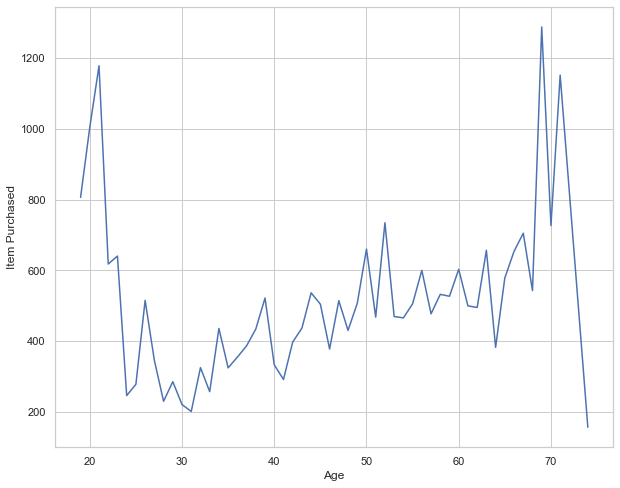

In [62]:
lp  = sns.lineplot(data=dfcopy, x="Age", y="Item Purchased", ci=None)
lp

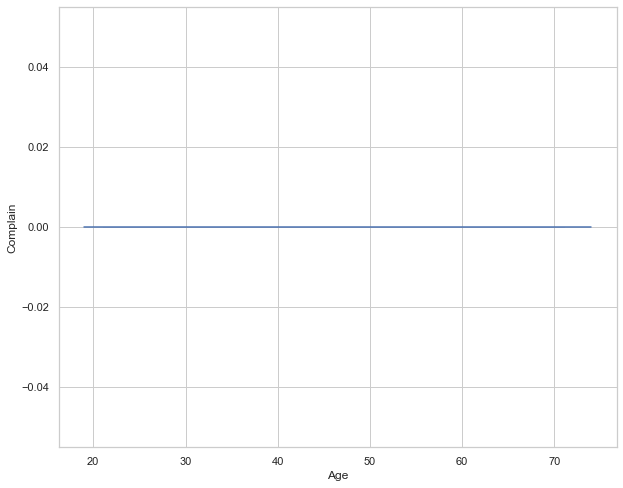

In [63]:
lp  = sns.lineplot(data=dfcopy, x="Age", y="Complain")
lp

In [64]:
dfcopy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age'],
      dtype='object')

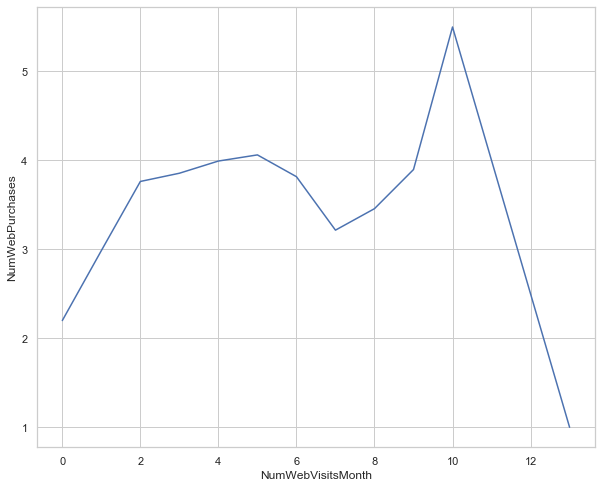

In [65]:
lp  = sns.lineplot(data=dfcopy, x="NumWebVisitsMonth", y="NumWebPurchases" , ci=None)
lp

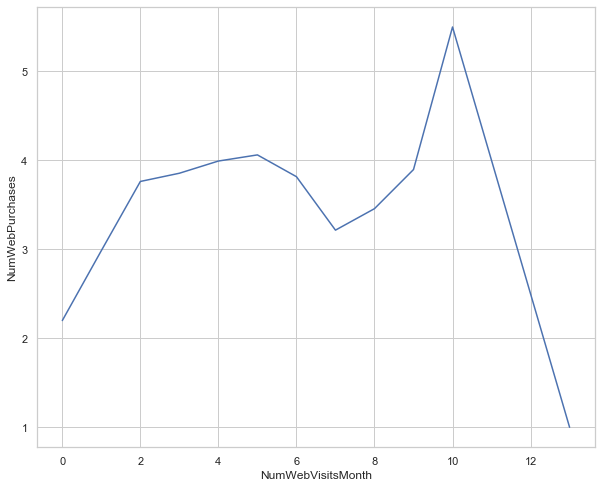

In [66]:
sns.lineplot(x="NumWebVisitsMonth",y = "NumWebPurchases", data = dfcopy, ci = None)

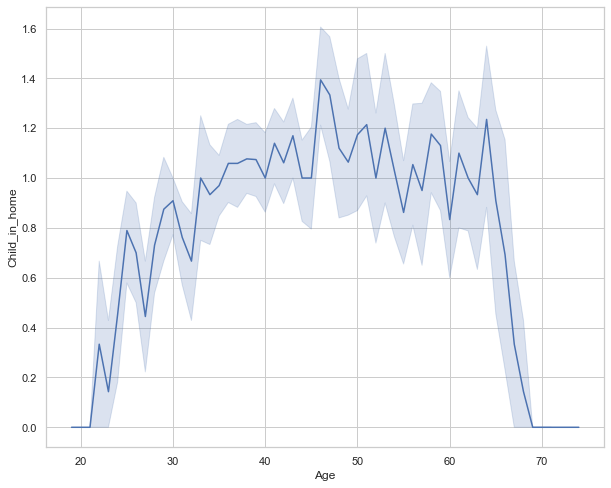

In [67]:
sns.lineplot(data = dfcopy, x = 'Age', y = 'Child_in_home')

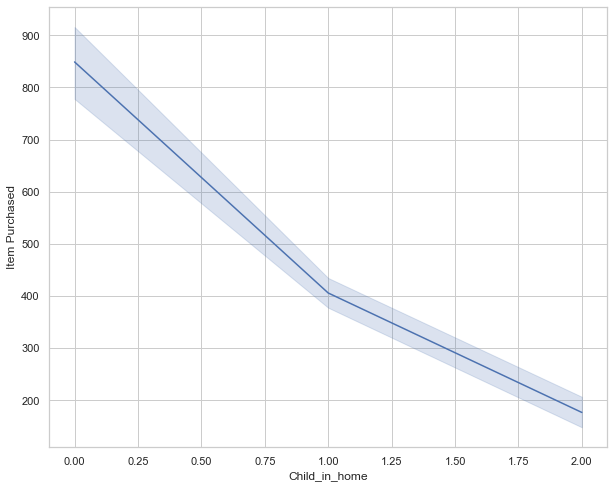

In [68]:
sns.lineplot( data=dfcopy, x = "Child_in_home", y = "Item Purchased" )

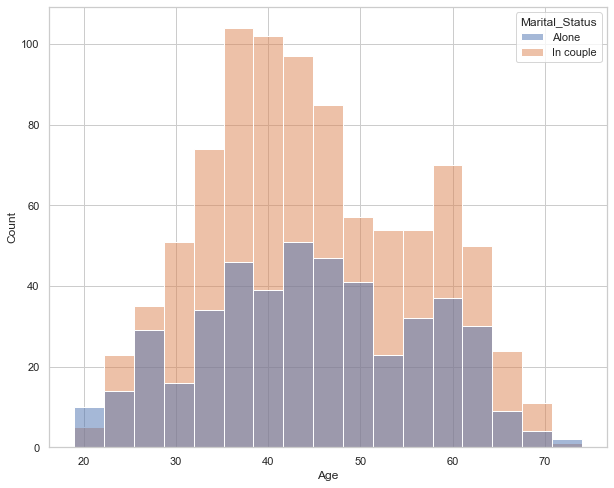

In [69]:
sns.histplot(data = dfcopy, x = "Age", hue = "Marital_Status")

In [70]:
dfcopy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age'],
      dtype='object')

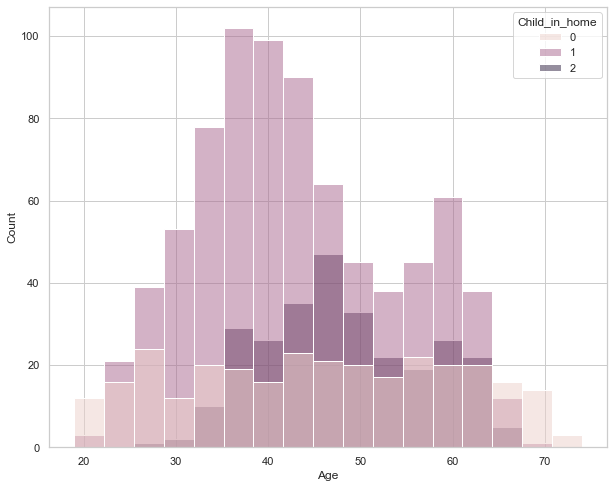

In [71]:
sns.histplot(data = dfcopy, x = "Age", hue = "Child_in_home")

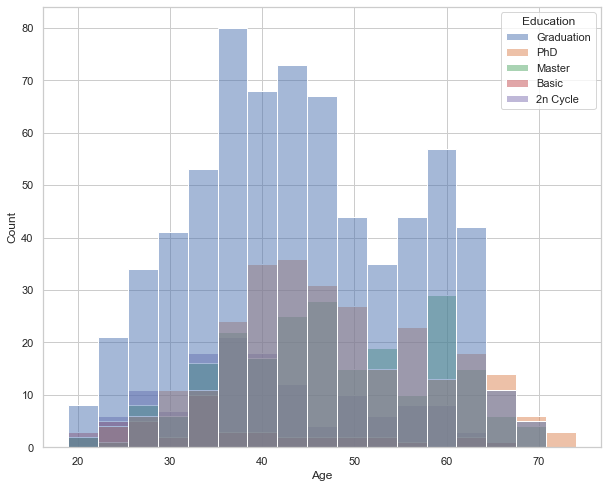

In [72]:
sns.histplot(data = dfcopy, x = "Age", hue = "Education")

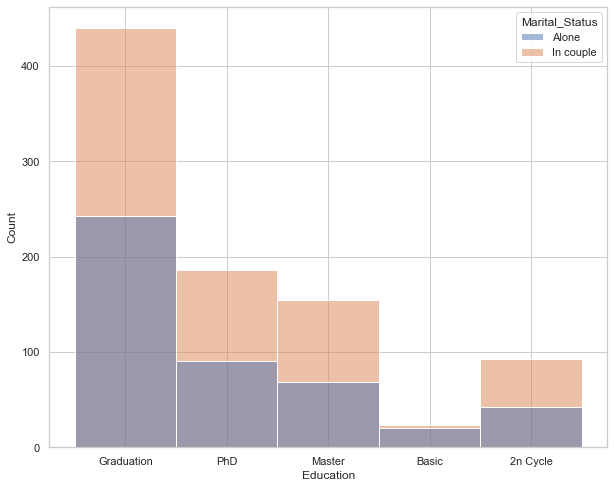

In [73]:
sns.histplot(data = dfcopy, x = "Education", hue = "Marital_Status")

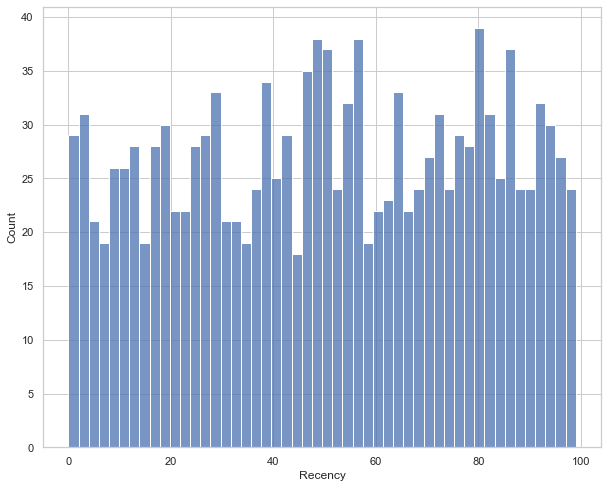

In [85]:
sns.histplot(data = dfcopy, x = "Recency", bins = 50)

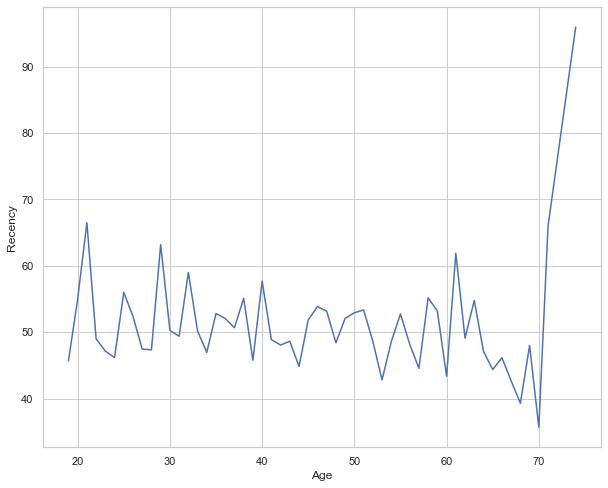

In [75]:
sns.lineplot(data= dfcopy , x= 'Age', y = 'Recency', ci = None)

In [76]:
dfcopy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age'],
      dtype='object')

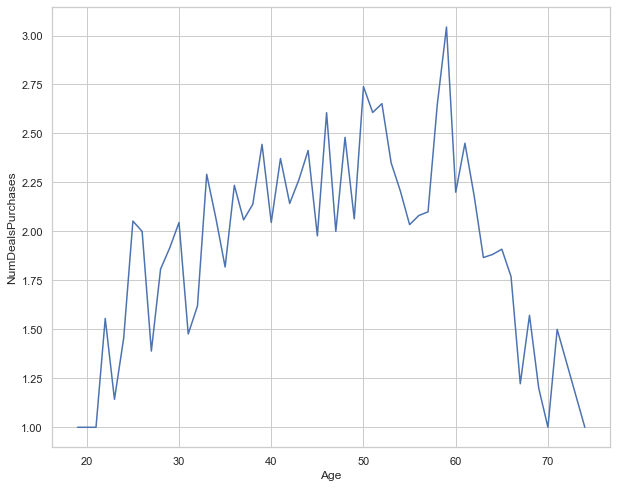

In [77]:
sns.lineplot(data= dfcopy , x= 'Age', y = 'NumDealsPurchases', ci = None)

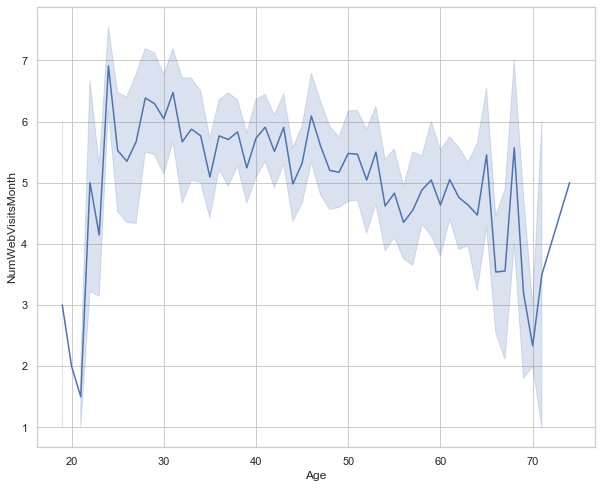

In [78]:
sns.lineplot(data= dfcopy , x= 'Age', y = 'NumWebVisitsMonth')

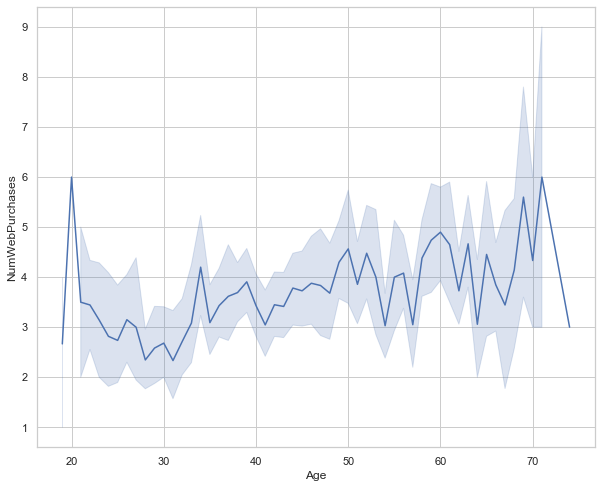

In [80]:
sns.lineplot(data = dfcopy, x = "Age", y = "NumWebPurchases")

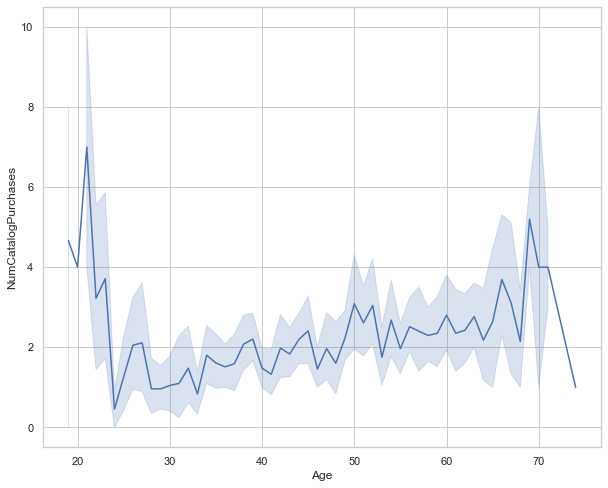

In [81]:
sns.lineplot(data = dfcopy, x = "Age", y = "NumCatalogPurchases")

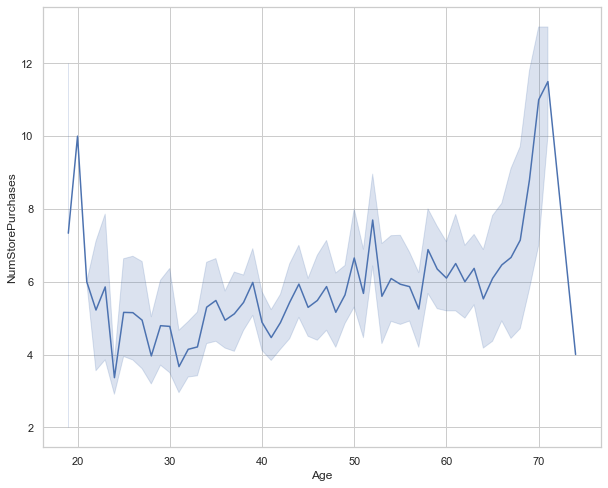

In [82]:
sns.lineplot(data = dfcopy, x = "Age", y = "NumStorePurchases")

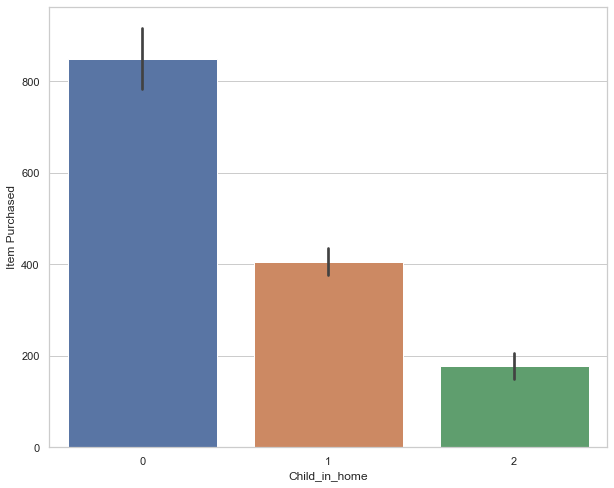

In [88]:
sns.barplot(data = dfcopy, x ="Child_in_home", y="Item Purchased" )

In [87]:
dfcopy.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Child_in_home', 'Camp_accepted',
       'Item Purchased', 'Age'],
      dtype='object')

In [91]:
df.Dt_Customer.head()

ID
5524    2012-09-04
2174    2014-03-08
4141    2013-08-21
6182    2014-02-10
5324    2014-01-19
Name: Dt_Customer, dtype: object